¿Qué es el EDA?
El Exploratory Data Analisys, análisis exploratorio de datos, consiste en el estudio exhaustivo de un conjunto de datos con tres objetivos principales:
- Entender mejor el problema de negocio que se está intentando solucionar.
- Encontrar imperfecciones en los datos que nos indiquen que debemos volver a la etapa de extracción de datos e incorporar mejoras.
- Extraer conclusiones sobre qué variables pueden tener una mayor importancia en el problema a modelar.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [114]:
data = pd.read_csv("titanic_train.csv")

Comprensión de la estructura de los datos

In [115]:
data.shape

(891, 12)

In [116]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [117]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [118]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [120]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33.00,0,0,345780,9.5000,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.00,0,1,PC 17592,39.4000,D28,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
576,577,1,2,"Garside, Miss. Ethel",female,34.00,0,0,243880,13.0000,NaN,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.00,1,1,36928,164.8667,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.00,1,0,19943,90.0000,C93,S


Como vemos, la mayoría son variabes numericas salvo el nombre, el sexo, que es un dato categórico (tiene dos categoría "female" y "male"), la cabina que es un código y un código de la ciudad de embarque.

Búsqueda de valores nulos y cálculo de estadísticos significativos

In [121]:
print(data.isnull().sum(axis = 0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Las variables Age, Cabin y Embarked tienen valores nulos.
Seguramente la variable cabina tenga un sentido lógico en lo que representa el dato (la mayoría es nulo)
mientras que los nulos en la edad o en la variable embarque se deban probablemente a defectos del dato o a efectos residuales.

In [122]:
data.describe() # este método nos da información sobre las variables numéricas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


En cuanto a la distribución de las variables continuas, vemos cómo algo menos del 40% sobrevivió (media de la variable survived 0.38), la media del pasaje rondaba los 30 años (media de la variable age 29.70), aunque el pasajero más lonjevo tenía 80 años y el menor no llegaba al año, más o menos había un hermano / esposo cada dos pasajeros (media de la variable SibSp 0.52) y un 38% de los pasajeros tenían algún hijo o algún padre de pasajeros (media de la variable Parch 0.38). En cuanto a los precios, la media está en 32.20 (libras seguramente) aunque el máximo es 512 y la mediana son 14.45.
La desviacion estandar en Fare es de 49, es alta, quiere decir que es una distribucion asimetrica. En la edad la desviacion estandar tambien es alta pero es menor con respecto a la media. 

Variables categóricas 

In [123]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Sobrevivieron 342 personas de un total de 891. 

In [124]:
data["Pclass"].value_counts() #cantidad de pasajeros por clase 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [125]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

De 891 pasajeros, 577 eran hombres y 314 eran mujeres

In [126]:
data["Embarked"].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

Podemos ver que algo más del 70% partió de Southampton, casi un 20% de Cherbourg y algo menos del 10% de Queenstown.

Visualización de distribuciones y correlaciones

Aunque los estadísticos básicos nos ayudan a empezar a comprender cómo se distribuyen los datos, poder verlos gráficamente puede ser muy esclarecedor y nos puede ayudar a sacar conclusiones importantes.

Pandas nos ofrece varios métodos de visualización, que resultan especialmente útiles: hist que nos sirve para pintar histogramas y plot.scatter que nos sirve para pintar gráficos de dispersión de dos variables

<AxesSubplot:>

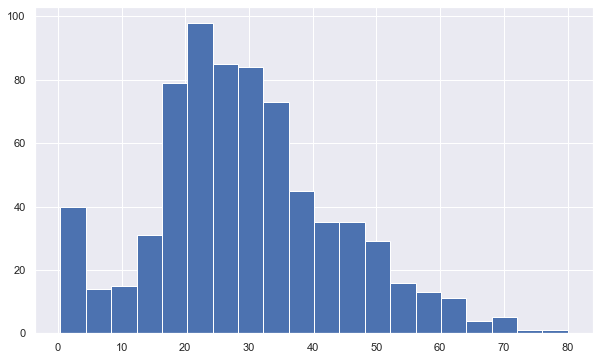

In [127]:
data["Age"].hist(bins=20)

Podemos ver, de la distribución de la edad, como, aunque la media se situaba en los 30 años, el valor más repetido está en torno a los 20 años y que es, precisamente, entre 20 y 30 años la edad más frecuente de la tripulación. Además, vemos un número relevante, al rededor de 40 pasajeros, con 0 años que seguramente sean bebes.

<AxesSubplot:>

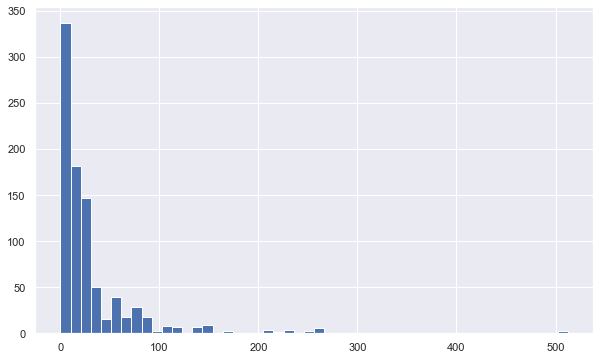

In [128]:
data["Fare"].hist(bins=50)

Aquí apreciamos como la tarifa no se distribuye de forma normal, si no exponencial, además, podemos observar outliers, valores fuera de rango que hay que estudiar para entender a qué pueden deberse.

Analizando outliers en la tarifa 

In [129]:
import plotly.express as px
fig = px.box(data, y="Fare")
fig.show()

In [130]:
data[data["Fare"] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Solo 3 pasajeros pagaron el precio de maximo, realizando una búsqueda, Thomas Drake Martinez era empresario,
los tres viajan en primera clase y, además, los tres sobrevivieron. Conlcuimos que no hay error en los datos. 

Veamos ahora la dependencia que existe entre variables, por ejemplo, la edad y el ticket/tarifa que se pagó. Esto podemos verlo utilizando un gráfico de dispersión y calculando la correlación:

In [131]:
data[["Age", "Fare"]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


La correlación es muy baja, no existe mucha relación entre la edad y el ticket que se paga.

Podemos verlo también a través de un graifo de dispersión: 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='Fare'>

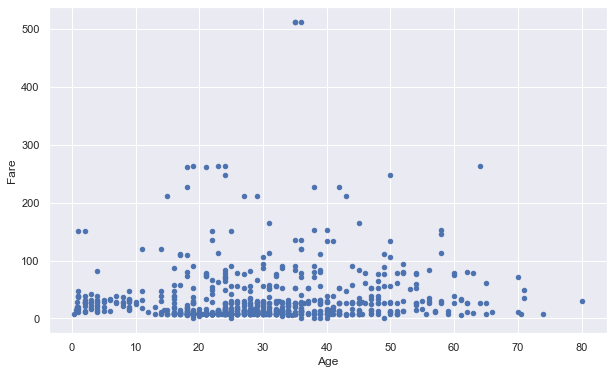

In [132]:
data.plot.scatter("Age","Fare")

Por último responderemos a las siguientes preguntas:
1) sobrevivieron en mayor medida mujeres y niños?
2) sobrevivieron en mayor medida pasajeros de primer clase?

In [133]:
data["niño_o_mujer"] = "NO"
data.loc[(data["Age"] <= 12) | (data["Sex"] == "female") ,"niño_o_mujer"] = "SI"

In [134]:
data["niño_o_mujer"].value_counts()

NO    540
SI    351
Name: niño_o_mujer, dtype: int64

De 891 pasajeros, 351 eran mujeres o niños.

In [135]:
data.groupby(["niño_o_mujer"])["Survived"].sum()

niño_o_mujer
NO     88
SI    254
Name: Survived, dtype: int64

De los 342 pasajeros que sobrevivieron, 254 eran mujeres o niños.

In [136]:
# Calculamos, con una agregación la cuenta y media de supervivencia de cada grupo
data.groupby(["niño_o_mujer","Survived"])["PassengerId"].count()

niño_o_mujer  Survived
NO            0           452
              1            88
SI            0            97
              1           254
Name: PassengerId, dtype: int64

In [137]:
round(data.groupby(["niño_o_mujer","Survived"])["PassengerId"].count()/len(data),2)

niño_o_mujer  Survived
NO            0           0.51
              1           0.10
SI            0           0.11
              1           0.29
Name: PassengerId, dtype: float64

Vemos como, claramente, las mujeres y los niños sobrevivieron en mayor medida. Aún así, hubo un 10% de mujeres y niños que no sobrevivieron.

In [138]:
data.groupby(["Pclass","Survived"])["PassengerId"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [139]:
data.groupby("Pclass")["Survived"].mean() 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

62% de pasajeros de primera clase, sobrevivieron 

¿cuántos de estos pasajeros de primera clase eran mujeres o niños?

In [144]:
data[data["Pclass"] == 1]["niño_o_mujer"].value_counts()

NO    119
SI     97
Name: niño_o_mujer, dtype: int64

In [145]:
data[data["Pclass"] == 1].groupby("niño_o_mujer")["Survived"].mean()

niño_o_mujer
NO    0.352941
SI    0.969072
Name: Survived, dtype: float64

El 96% de niños y mujeres que estaban en primera clase, sobrevivieron

<AxesSubplot:xlabel='Pclass,niño_o_mujer'>

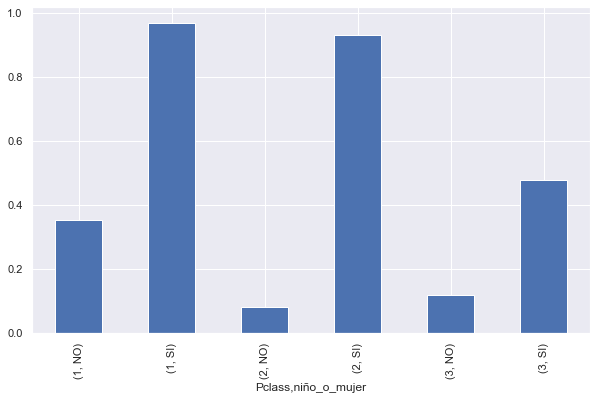

In [146]:
data.groupby(["Pclass","niño_o_mujer"])["Survived"].mean().plot.bar()

En este gráfico se ve claramente como, aunque ser mujer y niño era muy relevante también lo era viajar en primera y segunda clase, de hecho la tasa de mujeres y niños de tercera clase que sobrevivieron es solo unos 10 puntos superior a la de hombres no niños de primera clase.